## Sports Data Scraping

# This script will attempt to scrape different sports pages and pull the statistics from and build many models from it
* Based on stats, predict if a player will bat above .300


In [77]:
# Importing packages
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import requests
import csv
import pandas as pd
import re
import warnings
import scipy

warnings.filterwarnings("ignore")

In [78]:
#Getting URL page and converting it to soup
url = 'https://www.espn.com/mlb/history/leaders/_/breakdown/season/year/2021'
text_page = requests.get(url)
soup_page = soup(text_page.text, 'html.parser')

#Creating blank dataframe with headers in prep for each player
headers = soup_page.find('tr', attrs={'class': 'colhead'})
columns = [col.get_text() for col in headers.find_all('td')]
players_stats_2021_df = pd.DataFrame(columns = columns)


for i in range(1, 300, 50):
    #Getting URL page and converting it to soup
    url = 'https://www.espn.com/mlb/history/leaders/_/breakdown/season/year/2021/start/{}'.format(i)
    text_page = requests.get(url)
    soup_page = soup(text_page.text, 'html.parser')
    
    #Pulling players rows and identitfying player rows from the table
    players_2021 = soup_page.find_all('tr', attrs = {'class': re.compile('row player-10-')})
    
    #Building the dataframe
    for player in players_2021:
        #Getting the stats for each player
        stats = [stat.get_text() for stat in player.find_all('td')]
    
        #Making a datafdrame for player stats
        temp_df = pd.DataFrame(stats).transpose()
        temp_df.columns = columns
    
        #Appending the player to the overall dataframe with all other players
        players_stats_2021_df = pd.concat([players_stats_2021_df, temp_df], ignore_index=True)
        
players_stats_2021_df.head()
    

,,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA
0,1,Luis Robert,1,53,215,35,75,19,1,8,28,11,46,5,1,.349
1,2,Ketel Marte,6,75,283,45,92,22,1,12,45,25,50,1,0,.325
2,3,Starling Marte,9,104,401,81,129,23,2,11,45,40,85,45,3,.322
3,4,Trea Turner,6,132,529,91,168,30,3,22,61,36,99,28,4,.318
4,5,Michael Brantley,12,116,454,68,143,29,2,8,45,33,50,1,0,.315


In [79]:
##Saving dataframe to csv
players_stats_2021_df.to_csv("players_stats_2021.csv", index = False, sep =',', encoding = 'utf-8')

In [80]:
players_stats_2021_df


,,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA
0,1,Luis Robert,1,53,215,35,75,19,1,8,28,11,46,5,1,.349
1,2,Ketel Marte,6,75,283,45,92,22,1,12,45,25,50,1,0,.325
2,3,Starling Marte,9,104,401,81,129,23,2,11,45,40,85,45,3,.322
3,4,Trea Turner,6,132,529,91,168,30,3,22,61,36,99,28,4,.318
4,5,Michael Brantley,12,116,454,68,143,29,2,8,45,33,50,1,0,.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,David Bote,3,84,262,28,51,10,0,8,33,21,61,0,1,.195
296,297,Billy McKinney,3,116,265,32,51,11,3,9,27,32,79,2,0,.192
297,298,Dom Nunez,1,73,206,27,38,11,3,8,29,31,83,0,0,.184
298,299,Eugenio Suarez,7,129,453,63,81,17,0,26,70,50,155,0,1,.179


## PCA ON Baseball Data To Determine Which Stats Best Predict Batting Average



In [81]:
#Import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing, decomposition

In [82]:
# Label creation
#1: BA >= .300
#2: BA < .300 and >= 0.275
#3: BA < 0.275 and >= 0.250
#4: BA < 0.250 and >= 0.200
#5: BA < 0
column = ['Rating_Label']
temp_lbls = []
for i in range(0,len(players_stats_2021_df.PLAYER)):
    if (float(players_stats_2021_df.BA[i]) >= 0.300):
        temp_lbl = 1
    if (float(players_stats_2021_df.BA[i]) < 0.300 and float(players_stats_2021_df.BA[i]) >= 0.275):
        temp_lbl = 2
    if (float(players_stats_2021_df.BA[i]) < 0.275 and float(players_stats_2021_df.BA[i]) >= 0.250):
        temp_lbl = 3
    if (float(players_stats_2021_df.BA[i]) < 0.250 and float(players_stats_2021_df.BA[i]) >= 0.200):
        temp_lbl = 4
    if (float(players_stats_2021_df.BA[i]) < 0.200 and float(players_stats_2021_df.BA[i]) >= 0):
        temp_lbl = 5
    temp_lbls.append(temp_lbl)    
    temp_df = pd.DataFrame(data=temp_lbls, columns = column)
    mlb_2021_players_lbl = pd.concat([players_stats_2021_df, temp_df], axis=1)


del temp_df

In [83]:
mlb_2021_players_lbl.head()

,,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,Rating_Label
0,1,Luis Robert,1,53,215,35,75,19,1,8,28,11,46,5,1,.349,1
1,2,Ketel Marte,6,75,283,45,92,22,1,12,45,25,50,1,0,.325,1
2,3,Starling Marte,9,104,401,81,129,23,2,11,45,40,85,45,3,.322,1
3,4,Trea Turner,6,132,529,91,168,30,3,22,61,36,99,28,4,.318,1
4,5,Michael Brantley,12,116,454,68,143,29,2,8,45,33,50,1,0,.315,1


In [84]:
# Features for PCA
cols_feat = ['YRS','G','AB','R', 'H','2B', '3B','HR', 'RBI', 'BB', 'SO', 'SB', 'CS']

# Extract the features
df_for_pca = mlb_2021_players_lbl[cols_feat]

# Remove rows with NaN
df_for_pca = df_for_pca.dropna()
df_for_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   YRS     300 non-null    object
 1   G       300 non-null    object
 2   AB      300 non-null    object
 3   R       300 non-null    object
 4   H       300 non-null    object
 5   2B      300 non-null    object
 6   3B      300 non-null    object
 7   HR      300 non-null    object
 8   RBI     300 non-null    object
 9   BB      300 non-null    object
 10  SO      300 non-null    object
 11  SB      300 non-null    object
 12  CS      300 non-null    object
dtypes: object(13)
memory usage: 32.8+ KB


In [85]:
# Standardize the features
scaler = preprocessing.StandardScaler()
tmp = scaler.fit_transform(df_for_pca)
df_for_pca_zscored = pd.DataFrame(data=tmp, columns=cols_feat)
del tmp

# Setup the PCA object 
pca_obj = decomposition.PCA().fit(df_for_pca_zscored)

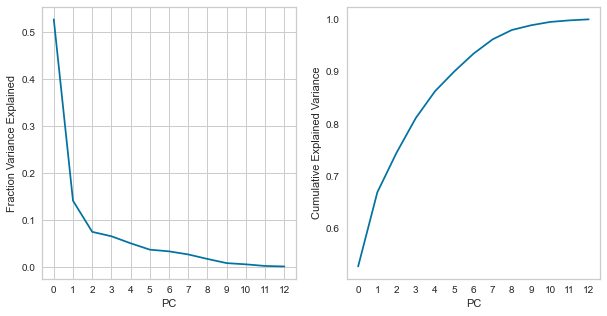

In [86]:
# Explained variance and cumulative explained variance for each PC
pcs_plot = np.arange(0,len(cols_feat))
pc_expl_var = pca_obj.explained_variance_ratio_[pcs_plot]
fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(10,5))
ax1.plot(pcs_plot, pca_obj.explained_variance_ratio_[pcs_plot])
ax1.set_xticks(pcs_plot)
ax1.set_xlabel('PC')
ax1.set_ylabel('Fraction Variance Explained')

ax2.plot(np.cumsum(pca_obj.explained_variance_ratio_[pcs_plot]))
# ax2.xticks(pcs_plot)`
ax2.set_xlabel('PC')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.grid()

plt.show()

<AxesSubplot:>

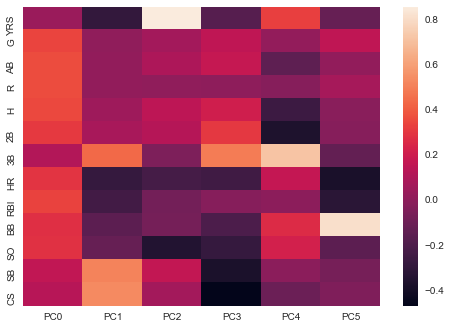

In [87]:
# Visualize loadings of the first few PCs
nPCs_ttl = len(pca_obj.components_) # number of PCs in total
nPCs = 6 # first n PCs to be selected
# the first 6 PCs (PC0 to PC5) explained roughly 60% of variance in total

# get loadings for PC, i.e. association of input features with each PC
loadings_mat = pca_obj.components_[0:nPCs, :]
# nPCs components x 11 features
loadings_mat.shape

cols_pc = ['PC'+str(i) for i in range(nPCs_ttl)]
loadings_df = pd.DataFrame(data = np.transpose(loadings_mat), 
                           index = cols_feat, 
                           columns = cols_pc[0:nPCs])
loadings_df.shape
sns.heatmap(loadings_df, xticklabels = True, yticklabels = True)

In [88]:
# features ranked by association with PC 0
loadings_df['PC0'].sort_values(ascending = False)

R      0.362395
AB     0.361598
H      0.351166
G      0.339204
RBI    0.332474
2B     0.310106
HR     0.290844
SO     0.280163
BB     0.275072
SB     0.157562
CS     0.124683
3B     0.110110
YRS    0.039925
Name: PC0, dtype: float64

In [89]:
# features ranked by association with PC 1
loadings_df['PC1'].sort_values(ascending = False)

CS     0.529525
SB     0.510069
3B     0.437415
2B     0.080536
H      0.047625
R      0.014799
AB     0.010964
G      0.005996
SO    -0.120390
BB    -0.149755
RBI   -0.237741
HR    -0.281695
YRS   -0.293562
Name: PC1, dtype: float64

In [90]:
# features ranked by association with PC 2
loadings_df['PC2'].sort_values(ascending = False)

YRS    0.853898
SB     0.164978
H      0.146877
2B     0.123992
AB     0.097339
G      0.064754
CS     0.062512
R      0.006754
3B    -0.050781
BB    -0.074517
RBI   -0.080962
HR    -0.229692
SO    -0.348751
Name: PC2, dtype: float64

In [91]:
# features ranked by association with PC 3
loadings_df['PC3'].sort_values(ascending = False)

3B     0.487323
2B     0.305448
H      0.209063
AB     0.172674
G      0.153641
R      0.004336
RBI   -0.024768
YRS   -0.175413
BB    -0.202802
HR    -0.243384
SO    -0.279525
SB    -0.375417
CS    -0.470372
Name: PC3, dtype: float64

In [92]:
def plot2D_pcs(df, pc_x, pc_y, explVar_x, explVar_y, col_target, targets, colors):
    '''
    Plot a 2D scatter plot of PC scores
    Inputs:
        df - a dataframe containing the PC scores and the target column
        pc_x - the name of the PC to be plotted on x-axis (needs to match the column name in df)
        pc_y - the name of the PC to be plotted on y-axis (needs to match the column name in df)
        explVar_x - the variance explained by pc_x (between 0 and 1)
        explVar_y - the variance explained by pc_y (between 0 and 1)
        col_target - column name of the target (e.g., a cateogrical variable) in df
        targets - a list of unique values in the target column
        colors - a list of colors to be used for each unique value in the target column
    '''
    # conver the explained variance to a percentage value
    explVar_pct_x = round(explVar_x, 3)*100
    explVar_pct_y = round(explVar_y, 3)*100
    fig, ax = plt.subplots()
    str_xlabel = pc_x + ' (PVE: ' + str(explVar_pct_x) + ')'
    str_ylabel = pc_y + ' (PVE: ' + str(explVar_pct_y) + ')'
    ax.set_xlabel(str_xlabel)
    ax.set_ylabel(str_ylabel)
    for target, color in zip(targets,colors):
        idxToKeep = df[col_target] == target
        ax.scatter(df.loc[idxToKeep, pc_x], df.loc[idxToKeep, pc_y],
                   c = color,
                   alpha=0.3)
    ax.legend(targets)
    
    plt.show()

In [93]:
# Plot features and visualize both the distribution fo data and association of features with data

# PCA coordinates derived from standardized data
pca_coords = pca_obj.fit_transform(df_for_pca_zscored)#[:, 0:nPCs]
pca_coords = pd.DataFrame(data = pca_coords, columns = cols_pc)
pca_coords

# Combine PC coordinates with the continuous variables as well as customer ratings (target)
df_pca_pcs = pd.concat([df_for_pca, mlb_2021_players_lbl['Rating_Label'], pca_coords], axis = 1)
df_pca_pcs

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,...,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,1,53,215,35,75,19,1,8,28,11,...,0.369730,-1.160950,-0.590726,1.282153,-0.383103,-0.759869,0.437500,-0.134117,0.187409,-0.183152
1,6,75,283,45,92,22,1,12,45,25,...,0.745878,-0.681486,-0.325239,1.048033,-0.552337,-0.580294,0.230214,-0.137867,0.086580,-0.183995
2,9,104,401,81,129,23,2,11,45,40,...,-2.137284,-0.207058,-0.180147,2.554632,2.946881,-0.573621,0.188587,-0.156460,-0.072354,-0.201243
3,6,132,529,91,168,30,3,22,61,36,...,-0.391086,-0.619666,-0.737155,1.168901,1.162138,0.056529,0.391019,0.237726,0.355521,-0.286263
4,12,116,454,68,143,29,2,8,45,33,...,1.918798,-0.550042,0.233014,0.195543,-0.270379,-0.221995,0.635072,0.146051,0.092415,-0.208233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3,84,262,28,51,10,0,8,33,21,...,-0.248399,-0.600128,0.008780,-0.045372,-0.142549,0.286960,-0.089415,0.037381,-0.048328,0.251152
296,3,116,265,32,51,11,3,9,27,32,...,0.791381,1.145491,0.438704,-0.370460,0.474899,0.252647,-0.544332,0.566833,-0.081598,-0.098355
297,1,73,206,27,38,11,3,8,29,31,...,0.548945,1.107334,0.177297,0.279089,-0.123449,-0.619210,-0.012153,-0.158026,-0.046432,0.086472
298,7,129,453,63,81,17,0,26,70,50,...,-1.051791,0.362627,-0.129920,-1.110076,0.320676,-0.122536,0.021664,0.240574,-0.183763,0.484961


## Clustering Analysis


In [94]:
from sklearn import cluster, metrics, preprocessing

In [95]:
def do_kmeans(df, feats_use, k = 2, scale = 'yes'): #, col_name = 'cluster'
    # df = pandas DataFrame with numeric features
    # feats_use = list or array features columns to subset
#     modifies dataframe to contain cluster labels
    
    # if the features in df are not standardized yet
    if scale=='yes':
        df_raw = df.copy()
        scaler = preprocessing.StandardScaler()
        tmp = scaler.fit_transform(df[feats_use])
        df = pd.DataFrame(data=tmp, columns=feats_use)
        del tmp
        
    data_use = df[feats_use].to_numpy().astype('float64')   
    # setup + run kmeans
    kmeans_obj = cluster.KMeans(init='k-means++', n_clusters = k, random_state = 42)
    clust_labs = kmeans_obj.fit_predict(data_use)
    # conver clust_labs to string (categorical)
    clust_labs = clust_labs.astype('str')
    
    return clust_labs
#     df[col_name] = clust_labs

In [96]:
# Features for PCA
cols_feat = ['YRS','G','AB','R', 'H','2B', '3B','HR', 'RBI', 'BB', 'SO', 'SB', 'CS']

# Extract the features
df_for_pca = mlb_2021_players_lbl[cols_feat]

# Remove rows with NaN
df_for_pca = df_for_pca.dropna()

In [97]:
# Do clustering
nClusters = 3
clust5_batting_average = do_kmeans(df_for_pca, feats_use=cols_feat, k=nClusters)

# calculate the silhouette score (higher means better clustering performance)
s_score = metrics.silhouette_score(mlb_2021_players_lbl[cols_feat], clust5_batting_average, metric="euclidean")
print('Number of clusters =', str(nClusters), ': Silhouette score =', str(s_score))

Number of clusters = 3 : Silhouette score = 0.3243038389141691


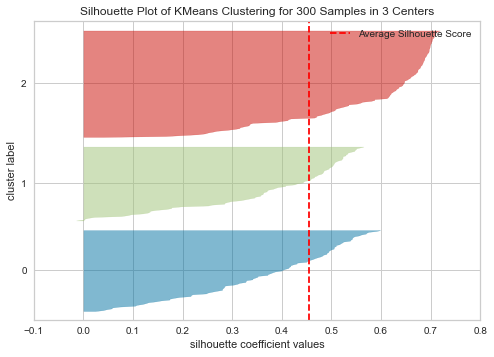

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 300 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [98]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit

# Instantiate the clustering model and visualizer
#model = KMeans(2, random_state=42)
#visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
#
#visualizer.fit(mlb_2021_players_lbl[cols_feat])        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

silhouette_visualizer(KMeans(3, random_state=42), mlb_2021_players_lbl[cols_feat], colors='yellowbrick')


## Running SVM to classify batting average labels

In [99]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [100]:
# Scaling the data between 0 and 1 for the purposes of SVM

for column in df_for_pca_zscored:
    temp = df_for_pca_zscored[cols_feat]
    scaled_temp = NormalizeData(temp)
    df_scaled_for_svm = pd.DataFrame(data=scaled_temp, columns=cols_feat)
    del temp
    del scaled_temp
    
    
df_scaled_for_svm_with_labels = pd.concat([df_scaled_for_svm, mlb_2021_players_lbl['Rating_Label']], axis = 1)
df_scaled_for_svm_with_labels.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,Rating_Label
0,0.05,0.000000,0.036082,0.193878,0.278195,0.432432,0.125,0.159091,0.129032,0.060345,0.118343,0.111111,0.111111,1
1,0.30,0.239130,0.211340,0.295918,0.406015,0.513514,0.125,0.250000,0.311828,0.181034,0.142012,0.022222,0.000000,1
2,0.45,0.554348,0.515464,0.663265,0.684211,0.540541,0.250,0.227273,0.311828,0.310345,0.349112,1.000000,0.333333,1
3,0.30,0.858696,0.845361,0.765306,0.977444,0.729730,0.375,0.477273,0.483871,0.275862,0.431953,0.622222,0.444444,1
4,0.60,0.684783,0.652062,0.530612,0.789474,0.702703,0.250,0.159091,0.311828,0.250000,0.142012,0.022222,0.000000,1


In [101]:
#Running SVM with only features from all that were included in PCA

import random
import numpy as np
import numpy.matlib
import sklearn 
import matplotlib.pyplot as plt
import itertools
import multiprocessing as mp
recall_all_feats = []
accuracy_all_feats = []
precision_all_feats = []

all_combos = np.array(list(itertools.combinations(range(0, df_scaled_for_svm_with_labels.Rating_Label.nunique()), 2)))
for x in range(0, all_combos.shape[0]):
    group1 = df_scaled_for_svm_with_labels[cols_feat].loc[(df_scaled_for_svm_with_labels.Rating_Label == all_combos[x, 0]+1)]
    group2 = df_scaled_for_svm_with_labels[cols_feat].loc[(df_scaled_for_svm_with_labels.Rating_Label == all_combos[x, 1]+1)]
    print("Computing combo", x+1, "of", all_combos.shape[0])
    #print("First group is", all_combos[x, 0]+1)
    #print("Second emotion is",all_combos[x, 1]+1)
    data_for_svm = np.concatenate((group1, group2), axis=0)
    #target labels
    targets = np.concatenate((np.matlib.repmat(1, group1.shape[0], 1), np.matlib.repmat(0, group2.shape[0], 1)), axis = 0)
    #data_for_svm = group1.append(group2)
    #building classifier
    from sklearn.model_selection import train_test_split
    #75% training and 25% test
    X_train, X_test, y_train, y_test = train_test_split(data_for_svm, targets, test_size=0.25,random_state=109) 
    #Import svm model
    from sklearn import svm
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel
    #Train the model using the training sets
    clf.fit(X_train, y_train.ravel())
    y_pred = clf.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
        # Model Accuracy: how often is the classifier correct?
        #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        # Model Precision: what percentage of positive tuples are labeled as such?
        #print("Precision:",metrics.precision_score(y_test, y_pred))
        # Model Recall: what percentage of positive tuples are labelled as such?
        #print("Recall:",metrics.recall_score(y_test, y_pred))
    recall_all_feats.append(metrics.recall_score(y_test, y_pred))
    accuracy_all_feats.append(metrics.accuracy_score(y_test, y_pred))
    precision_all_feats.append(metrics.precision_score(y_test, y_pred))

print("Average accuracy is ", np.mean(accuracy_all_feats, axis = 0))

Computing combo 1 of 10
Computing combo 2 of 10
Computing combo 3 of 10
Computing combo 4 of 10
Computing combo 5 of 10
Computing combo 6 of 10
Computing combo 7 of 10
Computing combo 8 of 10
Computing combo 9 of 10
Computing combo 10 of 10
Average accuracy is  0.8772661674983656


In [102]:
top5_features = ['H', 'AB', 'R', 'G', 'RBI']

In [103]:
#Running SVM with only features from the top 5 PC's identified using PCA

recall_top5_feats = []
accuracy_top5_feats = []
precision_top5_feats = []

all_combos = np.array(list(itertools.combinations(range(0, df_scaled_for_svm_with_labels.Rating_Label.nunique()), 2)))
for x in range(0, all_combos.shape[0]):
    group1 = df_scaled_for_svm_with_labels[top5_features].loc[(df_scaled_for_svm_with_labels.Rating_Label == all_combos[x, 0]+1)]
    group2 = df_scaled_for_svm_with_labels[top5_features].loc[(df_scaled_for_svm_with_labels.Rating_Label == all_combos[x, 1]+1)]
    print("Computing combo", x+1, "of", all_combos.shape[0])
    #print("First group is", all_combos[x, 0]+1)
    #print("Second emotion is",all_combos[x, 1]+1)
    data_for_svm = np.concatenate((group1, group2), axis=0)
    #target labels
    targets = np.concatenate((np.matlib.repmat(1, group1.shape[0], 1), np.matlib.repmat(0, group2.shape[0], 1)), axis = 0)
    #data_for_svm = group1.append(group2)
    #building classifier
    from sklearn.model_selection import train_test_split
    #75% training and 25% test
    X_train, X_test, y_train, y_test = train_test_split(data_for_svm, targets, test_size=0.25,random_state=109) 
    #Import svm model
    from sklearn import svm
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel
    #Train the model using the training sets
    clf.fit(X_train, y_train.ravel())
    y_pred = clf.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
        # Model Accuracy: how often is the classifier correct?
        #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        # Model Precision: what percentage of positive tuples are labeled as such?
        #print("Precision:",metrics.precision_score(y_test, y_pred))
        # Model Recall: what percentage of positive tuples are labelled as such?
        #print("Recall:",metrics.recall_score(y_test, y_pred))
    recall_top5_feats.append(metrics.recall_score(y_test, y_pred))
    accuracy_top5_feats.append(metrics.accuracy_score(y_test, y_pred))
    precision_top5_feats.append(metrics.precision_score(y_test, y_pred))
    
print('Average Accuracy = ', np.mean(accuracy_top5_feats, axis = 0))


Computing combo 1 of 10
Computing combo 2 of 10
Computing combo 3 of 10
Computing combo 4 of 10
Computing combo 5 of 10
Computing combo 6 of 10
Computing combo 7 of 10
Computing combo 8 of 10
Computing combo 9 of 10
Computing combo 10 of 10
Average Accuracy =  0.8777531804853785


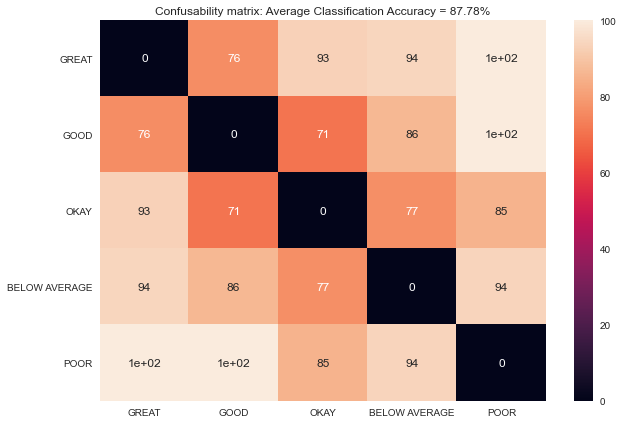

In [140]:
# Visualizaing confusability matrices
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#Building confusability matrix
acc_conf_mat = scipy.spatial.distance.squareform(accuracy_top5_feats, force='yes', checks=True)
acc_conf_mat = acc_conf_mat*100

df_cm = pd.DataFrame(acc_conf_mat, index = [i for i in ["GREAT", "GOOD", "OKAY", "BELOW AVERAGE", "POOR"]],
                  columns = [i for i in ["GREAT", "GOOD", "OKAY", "BELOW AVERAGE", "POOR"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
ax = plt.axes()
ax.set_title(f'Confusability matrix: Average Classification Accuracy = {round(np.mean(accuracy_top5_feats, axis = 0)*100, 2)}%' ) 
plt.show()

In [136]:
acc_conf_mat = scipy.spatial.distance.squareform(accuracy_top5_feats, force='yes', checks=True)
acc_conf_mat = acc_conf_mat*100